# Software implementing Heston Model with history data
### The coefficients used here and the expected results were find in "Exact Simulation of Stochastic Volatility and Other Affine Jump Diffusion Processes", by Mark Broadie and Özgür Kaya.

With 100 simulations
The final result = 36.34182036265829
Execution time = 3.230822801589966


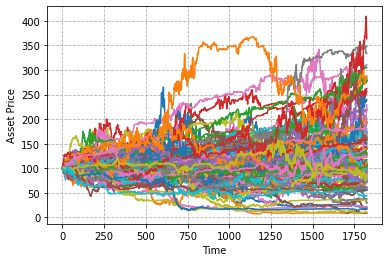

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

np.random.seed(10)
# fig, ax = plt.subplots(4)
# ax[0].axis(xmin=0,xmax=365*5)
# ax[1].axis(xmin=0,xmax=365*5)
# ax[2].axis(xmin=0,xmax=365*5)
# ax[3].axis(xmin=0,xmax=365*5)

def Heston(Initial_price, Strike_price, Rate_of_return, Initial_volatility, Rho, Kappa, Theta, Epsilon, T, dt):    
    # Generates single Monte Carlo simulation for the Heston model

    ### Generate random Brownian Motion ###
    MU = np.array([0, 0])                   # both Ws and Wv have expectation = 0
    COV = np.matrix([[1, Rho], [Rho, 1]])           # both Ws and Wv have variance = 1
    W = np.random.multivariate_normal(MU, COV, T)       # generates bivariate standard normal sample(Ws,Wv) with correlation coefficient = Rho
    Ws = W[:,0]                         # gets Ws array
    Wv = W[:,1]                         # gets Wv array


    ### Generate paths ###
    v_path = np.zeros(T)                     # generate volatility path array
    v_path[0] = Initial_volatility                # set initial value of volatility
    S_path = np.zeros(T)                     # generate price path array
    S_path[0] = Initial_price                   # set initial price
    for t in range(1,T):                     # simulate one path to time T
        v_path[t] = v_path[t-1] + Kappa*(Theta-max(v_path[t-1],0))*dt + Epsilon*np.sqrt(max(v_path[t-1],0)*dt)*Wv[t]
        #S_path[t] = S_path[t-1]*np.exp((Rate_of_return - 0.5*max(v_path[t-1],0))*dt + np.sqrt(max(v_path[t-1],0)*dt)*Ws[t])
        S_path[t] = S_path[t-1] + Rate_of_return*S_path[t-1]*dt + S_path[t-1]*np.sqrt(max(v_path[t-1],0)*dt)*Ws[t]
        #-(S_path[t-1]*max(v_path[t-1],0)*dt/2)*(1-Ws[t]**2)

    
    ### Plotting price path ###
    plot_start = time.time()
    # ax[0].plot(S_path[:90*5])
    # ax[0].set_xlabel('Time')
    # ax[0].set_ylabel('Asset Price')
    # ax[0].grid(linestyle = '--')
    # ax[1].plot(S_path[:180*5])
    # ax[1].set_xlabel('Time')
    # ax[1].set_ylabel('Asset Price')
    # ax[1].grid(linestyle = '--')
    # ax[2].plot(S_path[:270*5])
    # ax[2].set_xlabel('Time')
    # ax[2].set_ylabel('Asset Price')
    # ax[2].grid(linestyle = '--')
    # ax[3].plot(S_path[:365*5])
    # ax[3].set_xlabel('Time')
    # ax[3].set_ylabel('Asset Price')
    # ax[3].grid(linestyle = '--')
    plt.plot(S_path)
    plt.xlabel('Time')
    plt.ylabel('Asset Price')
    plot_end = time.time()
    single_plotting_time = (plot_end - plot_start)
    

    return max(0, S_path[-1] - Strike_price), single_plotting_time  # return single final simulation result of option price, and plotting time



def HestonMCS(Number_of_simulation, Initial_price, Strike_price, Rate_of_return, Initial_volatility, Rho, Kappa, Theta, Epsilon, T, dt):    
    # Monte Carlo simulation for N times and get expected result
    total_plotting_time = 0                    # for excluding the time spend on plotting
    start_time = time.time()                    # record the starting time to evaluate the execution time
    sum = 0                            # set up for the accumulation
    for i in range(Number_of_simulation):             # N times simulation
        (single_option_price, single_plotting_time) = Heston(Initial_price, Strike_price, Rate_of_return, Initial_volatility, Rho, Kappa, Theta, Epsilon, T, dt)
        sum += (single_option_price, single_plotting_time)[0]
        total_plotting_time += (single_option_price, single_plotting_time)[1]
    result = (sum/Number_of_simulation)*np.exp(-Rate_of_return*T/365) # get NPV
    end_time = time.time()
    spend_time = end_time - start_time - total_plotting_time
    plt.grid(linestyle = '--')
    print('With '+str(Number_of_simulation)+' simulations\nThe final result = '+str(result)+'\nExecution time = '+str(spend_time))

#HestonMCS(10000, 100, 100, 0.0319, 0.010201, -0.7, 6.21, 0.019, 0.61, 365, 1/365)
HestonMCS(100, 100, 100, 0.05, 0.09, -0.3, 2, 0.09, 1, 5*365, 1/365)

With 10000 simulations
The final result = 6.835458336870432
Execution time = 34.777743101119995


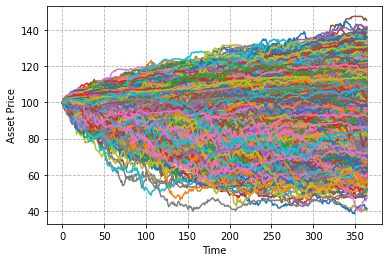

In [ ]:
np.random.seed(1)
# fig, ax = plt.subplots(4, figsize=(15, 15))
# ax[0].axis(xmin=0,xmax=370)
# ax[1].axis(xmin=0,xmax=370)
# ax[2].axis(xmin=0,xmax=370)
# ax[3].axis(xmin=0,xmax=370)
# ax[0].axis(ymin=30,ymax=150)
# ax[1].axis(ymin=30,ymax=150)
# ax[2].axis(ymin=30,ymax=150)
# ax[3].axis(ymin=30,ymax=150)
HestonMCS(10000, 100, 100, 0.0319, 0.010201, -0.7, 6.21, 0.019, 0.61, 365, 1/365)

In [ ]:
# bbox = ax[0].get_tightbbox(fig.canvas.get_renderer())
# fig.savefig("0.png",bbox_inches=bbox.transformed(fig.dpi_scale_trans.inverted()).expanded(1.04, 1.04))
# bbox = ax[1].get_tightbbox(fig.canvas.get_renderer())
# fig.savefig("1.png",bbox_inches=bbox.transformed(fig.dpi_scale_trans.inverted()).expanded(1.04, 1.04))
# bbox = ax[2].get_tightbbox(fig.canvas.get_renderer())
# fig.savefig("2.png",bbox_inches=bbox.transformed(fig.dpi_scale_trans.inverted()).expanded(1.04, 1.04))
# bbox = ax[3].get_tightbbox(fig.canvas.get_renderer())
# fig.savefig("3.png",bbox_inches=bbox.transformed(fig.dpi_scale_trans.inverted()).expanded(1.04, 1.04))

In [ ]:
# import imageio
# with imageio.get_writer('mygif.gif', mode='I') as writer:
#     for filename in ['0.png', '1.png', '2.png', '3.png']:
#         image = imageio.imread(filename)
#         writer.append_data(image)

# Software example of bivariate, correlated Gaussian random samples

mean=-0.00033114774100984106, var=1.0035703245882917
mean=0.0017814219261670882, var=0.9976609932285281


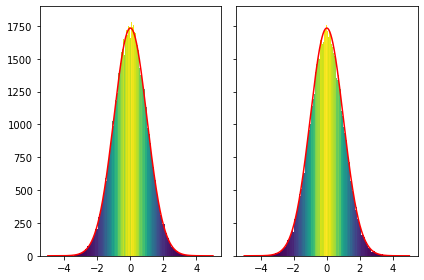

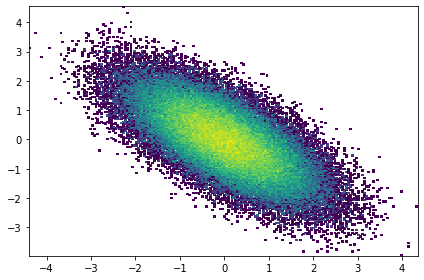

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

### Setting parameters ###
T = 100000
Rho = -0.7
n_bins = 200

### Generate random Brownian Motion ###
MU = np.array([0, 0])                   # both Ws and Wv have expectation = 0
COV = np.matrix([[1, Rho], [Rho, 1]])           # both Ws and Wv have variance = 1
W = np.random.multivariate_normal(MU, COV, T)       # generates bivariate standard normal sample(Ws,Wv) with correlation coefficient = Rho
Ws = W[:,0]                         # gets Ws array
Wv = W[:,1]                         # gets Wv array

### Statistically evaluate quailty ###
S_mean = np.mean(Ws)
S_var = np.var(Ws)
v_mean = np.mean(Wv)
v_var = np.var(Wv)



### 1D distribution ###
x = np.linspace(-5, 5, 10000)
y = (np.exp(-np.power(x - 0, 2.) / (2 * np.power(1, 2.))) / np.sqrt(2*np.pi)) * T/23

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

N, bins, patches = axs[0].hist(Ws, bins=n_bins)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
axs[0].hist(Ws, bins=n_bins, density=True)
axs[0].plot(x, y, color='r')
#axs[0].plt.xlabel('mean='+str(S_mean)+', var='+str(S_var))


N, bins, patches = axs[1].hist(Wv, bins=n_bins)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
axs[1].hist(Wv, bins=n_bins, density=True)
axs[1].plot(x, y, color='r')
#axs[1].xlabel('mean='+str(v_mean)+', var='+str(v_var))
print('mean='+str(S_mean)+', var='+str(S_var))
print('mean='+str(v_mean)+', var='+str(v_var))

### 2D distribution ###
fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(Ws, Wv, bins=n_bins, norm=colors.LogNorm())

# Hardware implementation of RNGs, with LFSR, box-muller method, and coloring transform
### The results of the RNGs (the .txt files) read from verilog testbench are displayed and measured here.

### Uniform(0, 1) is implemented with LFSR

mean = 0.5004436355799999
var = 0.08279459949585326


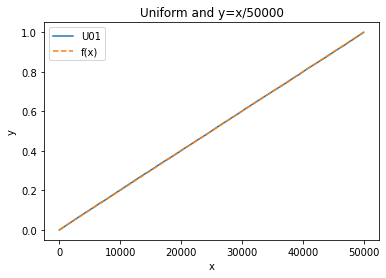

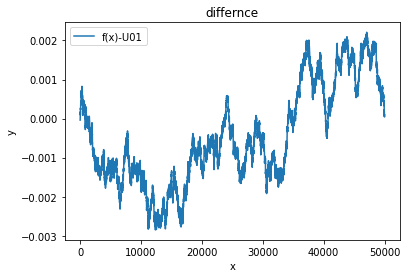

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter


### get data from .txt ###
f = open("./U01.txt", "r")
data1 = f.readlines()
data1_f = []
for i in range(len(data1)):
    data1_f.append(float(data1[i]))

U01 = sorted(data1_f)

mean = np.mean(U01)
var = np.var(U01)
print("mean = "+str(mean))
print("var = "+str(var))

x = np.arange(0,50000)
y = x/50000
diff = []
for i in range(len(U01)):
    diff.append(y[i]-U01[i])
plt.title("Uniform and y=x/50000") 
plt.xlabel("x") 
plt.ylabel("y") 
plt.plot(x,U01,label='U01')
plt.plot(x,y,'--',label='f(x)') 
plt.legend()
plt.show()

plt.title("differnce") 
plt.xlabel("x") 
plt.ylabel("y") 
plt.plot(x,diff,label='f(x)-U01')
plt.legend()
plt.show()



### Bivariate Gaussian(0, 1) is obtained by applying box-muller method to U(0, 1) distribution  

G1 mean=-0.00642848068
G1 var=1.0012827588627102
G2 mean=-0.0038530712199999987
G2 var=0.9950575896909714
correlation described by: 
[ 1.         -0.00262996]
[-0.00262996  1.        ]


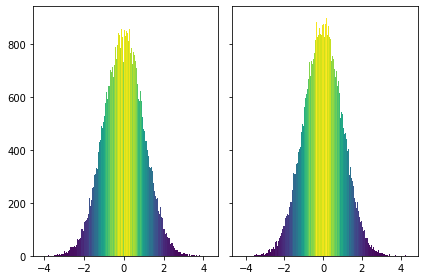

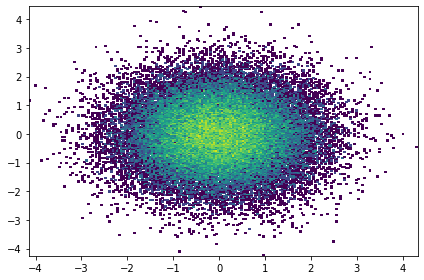

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter


### get data from .txt ###
f = open("./GRNG1.txt", "r")
data1 = f.readlines()
data1_f = []
for i in range(len(data1)):
    data1_f.append(float(data1[i]))

f = open("./GRNG2.txt", "r")
data2 = f.readlines()
data2_f = []
for i in range(len(data2)):
    data2_f.append(float(data2[i]))


### 1D distribution ###
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

n_bins = 200

# T = 100000

x = np.linspace(-5, 5, 10000)
# y = (np.exp(-np.power(x - 0, 2.) / (2 * np.power(1, 2.))) / np.sqrt(2*np.pi)) * T/23

N, bins, patches = axs[0].hist(data1_f, bins=n_bins)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
axs[0].hist(data1_f, bins=n_bins, density=True)
# axs[0].plot(x, y, color='r')

N, bins, patches = axs[1].hist(data2_f, bins=n_bins)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
axs[1].hist(data2_f, bins=n_bins, density=True)
# axs[1].plot(x, y, color='r')
#axs[1].xlabel('mean='+str(v_mean)+', var='+str(v_var))


### Statistically evaluate quailty ###
G1_mean = np.mean(data1_f)
G1_var = np.var(data1_f)
G2_mean = np.mean(data2_f)
G2_var = np.var(data2_f)
print('G1 mean='+str(G1_mean))
print('G1 var='+str(G1_var))
print('G2 mean='+str(G2_mean))
print('G2 var='+str(G2_var))


### 2D distribution ###
fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(data1_f, data2_f, bins=n_bins, norm=colors.LogNorm())

### correlation ###
print('correlation described by: ')
print(np.corrcoef(data1_f, data2_f)[0])
print(np.corrcoef(data1_f, data2_f)[1])

### Correlated bivariate Gaussian distribution is obtained by applying coloring transform

W1 mean=-0.0096547092
W1 var=1.010165150088196
W2 mean=0.006584364180000002
W2 var=1.0204536159342583
correlation described by: 
[ 1.         -0.70407698]
[-0.70407698  1.        ]


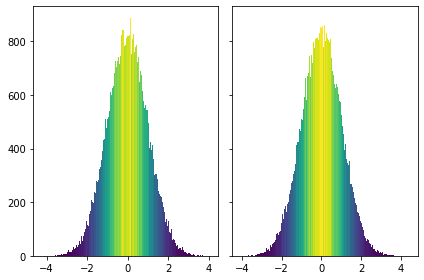

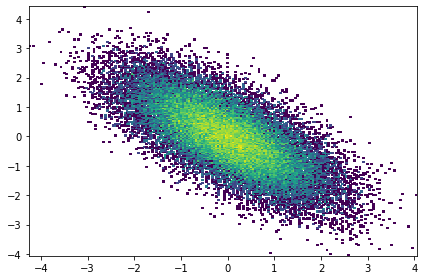

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter


### get data from .txt ###
f = open("./Corr1.txt", "r")
data1 = f.readlines()
data1_f = []
for i in range(len(data1)):
    data1_f.append(float(data1[i]))

f = open("./Corr2.txt", "r")
data2 = f.readlines()
data2_f = []
for i in range(len(data2)):
    data2_f.append(float(data2[i]))


### 1D distribution ###
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

n_bins = 200

# T = 100000

x = np.linspace(-5, 5, 10000)
# y = (np.exp(-np.power(x - 0, 2.) / (2 * np.power(1, 2.))) / np.sqrt(2*np.pi)) * T/23

N, bins, patches = axs[0].hist(data1_f, bins=n_bins)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
axs[0].hist(data1_f, bins=n_bins, density=True)
# axs[0].plot(x, y, color='r')

N, bins, patches = axs[1].hist(data2_f, bins=n_bins)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
axs[1].hist(data2_f, bins=n_bins, density=True)
# axs[1].plot(x, y, color='r')
#axs[1].xlabel('mean='+str(v_mean)+', var='+str(v_var))


### Statistically evaluate quailty ###
W1_mean = np.mean(data1_f)
W1_var = np.var(data1_f)
W2_mean = np.mean(data2_f)
W2_var = np.var(data2_f)
print('W1 mean='+str(W1_mean))
print('W1 var='+str(W1_var))
print('W2 mean='+str(W2_mean))
print('W2 var='+str(W2_var))


### 2D distribution ###
fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(data1_f, data2_f, bins=n_bins, norm=colors.LogNorm())

### correlation ###
print('correlation described by: ')
print(np.corrcoef(data1_f, data2_f)[0])
print(np.corrcoef(data1_f, data2_f)[1])

# A software example of the host side function for reading hardware MC core result and compute the final option price

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

Num_of_sim = 1000


### get data from .txt ###
f = open("./Path.txt", "r")
data1 = f.readlines()
data1_f = []
# for i in range(len(data1)):
#     data1_f.append(float(data1[i]))
for i in range(1,Num_of_sim+1):
    data1_f.append(float(data1[366*i-1]))
# print(data1_f)

for i in range(len(data1_f)):
    data1_f[i] = max(0, data1_f[i]-100)
# print(data1_f)

sum = 0                            # set up for the accumulation
for i in range(len(data1_f)):
    sum += data1_f[i]
result = (sum/Num_of_sim)*np.exp(-0.0319*365/365) # get NPV

print('number of simulation: '+ str(len(data1_f)))
print('final result: ' + str(result))


number of simulation: 1000
final result: 6.8526502876780615


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

Num_of_sim = 2500


### get data from .txt ###
f = open("./Path.txt", "r")
data1 = f.readlines()
data1_f = []
# for i in range(len(data1)):
#     data1_f.append(float(data1[i]))
for i in range(1,Num_of_sim+1):
    data1_f.append(float(data1[366*i-1]))
# print(data1_f)

for i in range(len(data1_f)):
    data1_f[i] = max(0, data1_f[i]-100)
# print(data1_f)

sum = 0                            # set up for the accumulation
for i in range(len(data1_f)):
    sum += data1_f[i]
result = (sum/Num_of_sim)*np.exp(-0.0319*365/365) # get NPV

print('number of simulation: '+ str(len(data1_f)))
print('final result: ' + str(result))

number of simulation: 2500
final result: 6.843464766924224


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

Num_of_sim = 25
offset = 2

### get data from .txt ###
f = open("./Path_pipe.txt", "r")
data1 = f.readlines()
data1_f = []
# for i in range(len(data1)):
#     data1_f.append(float(data1[i]))
for i in range(offset+1,offset+26):
    data1_f.append(float(data1[1467*i-3]))
    data1_f.append(float(data1[1467*i-2]))
    data1_f.append(float(data1[1467*i-1]))
    data1_f.append(float(data1[1467*i-0]))
# print(data1_f)

for i in range(len(data1_f)):
    data1_f[i] = max(0, data1_f[i]-100)
# print(data1_f)

sum = 0                            # set up for the accumulation
for i in range(len(data1_f)):
    sum += data1_f[i]
result = (sum/(len(data1_f)))*np.exp(-0.0319*365/365) # get NPV

print('number of simulation: '+ str(len(data1_f)))
print('final result: ' + str(result))


number of simulation: 100
final result: 6.864171102021304


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import time

# Num_of_sim = 25
offset = 0

### get data from .txt ###
start_time = time.time()
f = open("./Path_pipe.txt", "r")
data1 = f.readlines()
data1_f = []
# for i in range(len(data1)):
#     data1_f.append(float(data1[i]))
for i in range(offset+1,offset+5001):
    data1_f.append(float(data1[1467*i-7]))
    data1_f.append(float(data1[1467*i-6]))
    data1_f.append(float(data1[1467*i-5]))
    data1_f.append(float(data1[1467*i-4]))
# print(data1_f)

for i in range(len(data1_f)):
    data1_f[i] = max(0, data1_f[i]-100)
# print(data1_f)

sum = 0                            # set up for the accumulation
for i in range(len(data1_f)):
    sum += data1_f[i]
result = (sum/(len(data1_f)))*np.exp(-0.0319*365/365) # get NPV

end_time = time.time()
used_time = end_time - start_time

print(used_time)
print('number of simulation: '+ str(len(data1_f)))
print('final result: ' + str(result))


0.854250431060791
number of simulation: 20000
final result: 6.671168794112833


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import time

# Num_of_sim = 25
offset = 0

### get data from .txt ###
start_time = time.time()
f = open("./Path_pipe.txt", "r")
data1 = f.readlines()
data1_f = []
# for i in range(len(data1)):
#     data1_f.append(float(data1[i]))
for i in range(offset+1,offset+4601):
    data1_f.append(float(data1[1467*i-7]))
    data1_f.append(float(data1[1467*i-6]))
    data1_f.append(float(data1[1467*i-5]))
    data1_f.append(float(data1[1467*i-4]))
# print(data1_f)

for i in range(len(data1_f)):
    data1_f[i] = max(0, data1_f[i]-100)
# print(data1_f)

sum = 0                            # set up for the accumulation
for i in range(len(data1_f)):
    sum += data1_f[i]
result = (sum/(len(data1_f)))*np.exp(-0.0319*365/365) # get NPV

end_time = time.time()
used_time = end_time - start_time

print(used_time)
print('number of simulation: '+ str(len(data1_f)))
print('final result: ' + str(result))

0.7949347496032715
number of simulation: 18400
final result: 6.684607558250437


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import time

# Num_of_sim = 25
offset = 0

### get data from .txt ###
start_time = time.time()
f = open("./Path_pipe.txt", "r")
data1 = f.readlines()
data1_f = []
# for i in range(len(data1)):
#     data1_f.append(float(data1[i]))
for i in range(offset+1,offset+108):
    data1_f.append(float(data1[1467*i-3]))
    data1_f.append(float(data1[1467*i-2]))
    data1_f.append(float(data1[1467*i-1]))
    data1_f.append(float(data1[1467*i-0]))
# print(data1_f)

for i in range(len(data1_f)):
    data1_f[i] = max(0, data1_f[i]-100)
# print(data1_f)

sum = 0                            # set up for the accumulation
for i in range(len(data1_f)):
    sum += data1_f[i]
result = (sum/(len(data1_f)))*np.exp(-0.0319*365/365) # get NPV

end_time = time.time()
used_time = end_time - start_time

print(used_time)
print('number of simulation: '+ str(len(data1_f)))
print('final result: ' + str(result))

0.015807151794433594
number of simulation: 428
final result: 6.828001602164157


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import time

# Num_of_sim = 25
offset = 0

### get data from .txt ###
start_time = time.time()
f = open("./Path_pipe.txt", "r")
data1 = f.readlines()
data1_f = []
# for i in range(len(data1)):
#     data1_f.append(float(data1[i]))
for i in range(offset+1,offset+90):
    data1_f.append(float(data1[1467*i-7]))
    data1_f.append(float(data1[1467*i-6]))
    data1_f.append(float(data1[1467*i-5]))
    data1_f.append(float(data1[1467*i-4]))
# print(data1_f)

for i in range(len(data1_f)):
    data1_f[i] = max(0, data1_f[i]-100)
# print(data1_f)

sum = 0                            # set up for the accumulation
for i in range(len(data1_f)):
    sum += data1_f[i]
result = (sum/(len(data1_f)))*np.exp(-0.0319*365/365) # get NPV

end_time = time.time()
used_time = end_time - start_time

print(used_time)
print('number of simulation: '+ str(len(data1_f)))
print('final result: ' + str(result))

0.019400596618652344
number of simulation: 356
final result: 6.819718027502011
